# **Lecture 22 - Simulation-based Inference - Bootstrapping**

---

<br>

### Packages

In [ ]:
# none

---

<br>

### Introduction

* Thus far, in this class, we have learned to

  * Import our data into an application or coding environment
    * `.csv`, `.json`, web scraping, etc.

  * Clean/wrangle/organize our data for analysis
    * Subsetting, writing functions, merging data, extracting data from text, etc.

  * Summarize our data using basic descriptive statistics
    * Central tendency and variability

  * Visualize our data to understand distributions and relationships
    * Scatterplots, `ggplot2`, etc.

* ***Congratulations!***

* We can use what we have learned to perform a basic analysis of a dataset!

* However, note that our descriptive statistics often only characterize a sample of data taken from a larger population

* To understand (i.e. infer) characteristics of an entire population from a sample, we require a new concept

  * ***Statistical inference*** - Inferring quantities about a population using a sample from the population while accounting for "sampling variability"

* Let's first explore this concept of ***sampling variability***

---

<br>

### Sampling Variability

#### Need for Sampling

* In practice, data scientists and statisticians are interested in characteristics of a population - this is most often the ***mean***!

  * Average calorie consumption among ALL first-time undergraduate students

  * Average amount of emphysema among ALL long-time smokers
  
  * Average test scores among ALL students underrepresented in STEM fields

* However, we are often unable to collect data on the entire population

  * Can we collect dietary data on ALL undergraduate students in the entire country?

  * Can we do a CT scan on ALL long-time smokers in the world?
  
  * Can we provide the same test to ALL students in the country?

* So what do we do?

* We can randomly sample a subset of the population

* Use the mean of the sample to estimate the mean of the population

<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width="500" >

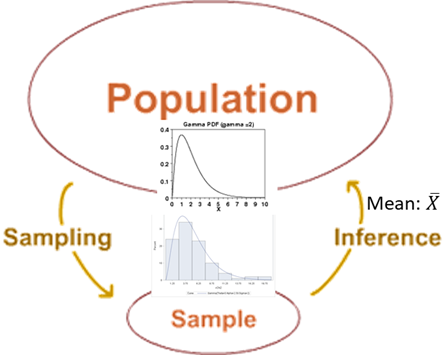


---




#### Scenario

* Imagine you are a researcher in education proposing a new placement test for college students

* You would like to estimate the average math score for this test
* Can we offer this test to ALL students?
  * What if it is a bad test? If we provide the test to everyone, a lot of money is wasted
  * Some students may opt out of taking the test
  * Offering to prospective test to ALL students may not be feasible

* What can we do?
  * We can randomly sample college students from the population
  * Use the average math score in the sample to estimate the average math score in the population



<br>



---




#### Example Population

* For illustration, we will assume we know the
  * **true** population mean math score
    * $\mu = 66.09$
  * **true** population standard deviation of math scores
    * $\sigma = 15.16$

* $\mu$ or mu is pronounced 'myu'
* $\sigma$ is pronounced 'sigma'
* Load our population data (we usually don't have this!)

* Population size (typically unknown)
* Population mean (typically unknown)
* Population standard deviation (typically unknown)
* Population distribution (typically unknown)

In [ ]:
# The entire population
population <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv")[, c("math.score")]
population <- data.frame(math.score = population)

# show first few lines
head(population)


# population size
N <- nrow(population)
N

# population mean
mu <- mean(population$math.score)
mu

# population standard deviation
stdev <- sd(population$math.score)
stdev

hist(population$math.score, breaks = 30,
     main = "Histogram of Math Scores",
     xlab = "Math Score")

,math.score
,<int>
1,72
2,69
3,90
4,47
5,76
6,71




---




#### Taking Our Sample

* Let's simulate taking a random sample of 50 students from our population

* We can do this using the `sample()` function

* The script below takes a random sample of `size = 50` from the numeric vector `population$math.score` without replacement

* "Without replacement" (`replace = FALSE`) means we cannot sample the same individual more than once
* Calculate our sample mean, which estimates our true (unknown) population mean

* The sample mean is denoted by $\bar{X}$, pronounced (x-bar)

* Is this average ($\bar{X}$) close to the true population mean ($\mu = 66.09$)?

* This sample could be misleading...

In [ ]:
set.seed(85862)  # ignore

math_sample <- sample(population$math.score, size = 50, replace = FALSE)
math_sample
# calculate sample mean (xbar)
xbar <- mean(math_sample)
xbar

[1] 53 61 35 69 51 60 36 53 35 42 62 65 35 70 57 58 69 78 48 47 77 38 35 40 47
[26] 91 79 47 24 46 67 65 58 50 69 59 65 58 65 68 49 61 53 59 46 43 58 46 87 69

* Let's try taking another random sample of 50 students from our population

In [ ]:
set.seed(1)  # ignore

# random sample
math_sample <- sample(population$math.score, size = 50, replace = FALSE)

# calculate sample mean
xbar        <- mean(math_sample)
xbar

[1] 67.14

* Is this average $\bar{X}$ close to the true population mean ($\mu = 66.09$)?

* What we are observing is ***sampling variability***
  * i.e. Estimates of the average (and other statistics) can change from sample to sample

* Let's try sampling 50 students over and over again to observe the distribution of the sample mean

In [ ]:
set.seed(2)  # ignore

# number of samples
n_samp = 500

# empty vector to store all the sample means
sample_means <- vector(length = n_samp)

# loop to calculate many sample means
for (i in 1:n_samp) {

  # bootstrap sample of size n
  math_sample <- sample(population$math.score, size = n_samp, replace = FALSE)

  # compute mean of single bootstrap sample
  sample_mean <- mean(math_sample)

  # store the bootstrap mean
  sample_means[i] <- sample_mean

}

In [ ]:
# our sample means
print(head(sample_means, 100))

  [1] 66.406 66.258 66.550 66.346 65.366 66.024 66.142 65.692 66.756 65.950
 [11] 66.116 66.586 66.054 65.736 66.942 66.234 65.818 66.216 66.188 66.148
 [21] 66.622 65.566 65.090 66.476 66.598 65.624 65.338 66.822 66.088 66.432
 [31] 66.346 65.808 65.314 65.870 66.022 65.986 65.764 65.956 66.344 64.700
 [41] 66.130 67.120 67.024 66.566 66.118 65.226 66.684 66.212 66.242 66.540
 [51] 66.256 65.834 66.068 65.550 66.236 66.430 66.678 65.908 66.092 66.656
 [61] 66.216 65.602 65.566 65.148 66.096 66.714 66.678 65.964 65.520 66.576
 [71] 65.968 65.590 66.402 65.732 65.980 65.232 65.534 66.266 66.068 66.458
 [81] 66.594 66.254 65.992 65.968 65.822 66.144 65.050 66.346 65.938 66.512
 [91] 66.522 66.696 66.146 66.356 66.360 65.712 66.144 65.728 66.110 66.030


* We can now plot the distribution of these samples means using a histogram

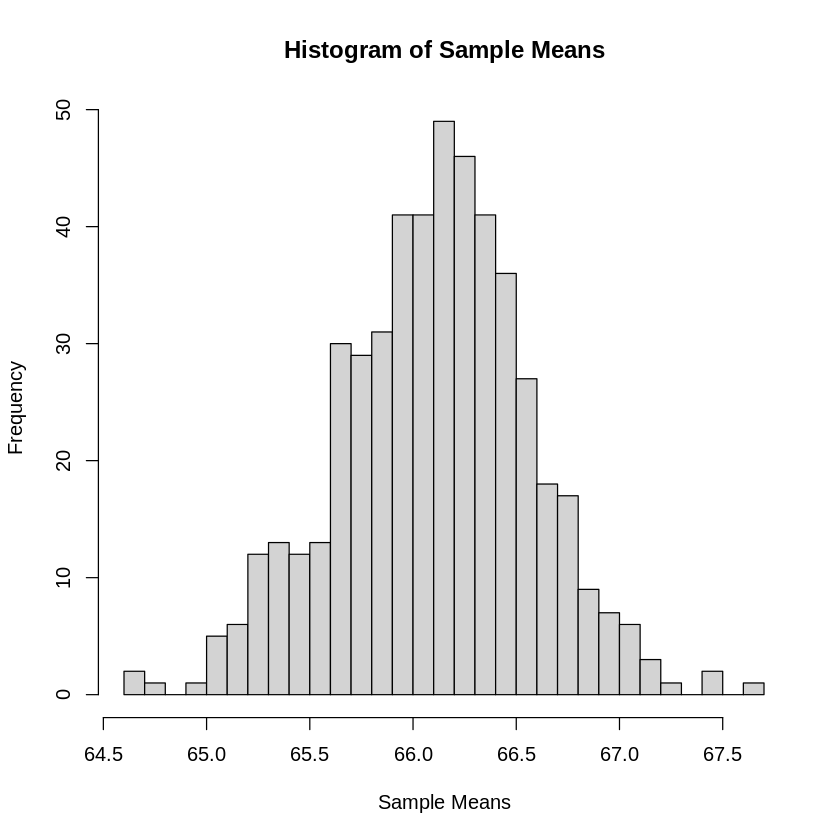

In [ ]:
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

* The histogram above shows the distribution of possible sample means if we took many random samples

* This is called the ***sampling distribution*** of our sample mean $\bar{X}$

* This illustrates that the sample mean varies from sample to sample
  * In practice we only take one sample, so this is NOT observed

* The histogram suggests we are unable to simply say the mean of a single sample is the population mean since the sample mean can change from sample to sample

* What are our options then?

  * Instead, we can incorporate our understanding of how the sample mean changes from sample to sample

  * That is, we "infer" properties (i.e. mean) of the population based on our understanding of sampling variability

  * This process is called "statistical inference"

* Statistical inference is performed using

  * Confidence intervals

  * Hypothesis testing

* For calculation, statistical inference is performed using

  * Conventional (theory-based) approaches

  * Simulation-based approaches

* You will have plenty of time to learn conventional statistical inference in your other classes

* Today we will cover a simulation-based approach to creating confidence intervals



---




### Confidence Intervals from the Sampling Distribution

* Below is the same histogram but with the true population mean and average of samples means on the same plot

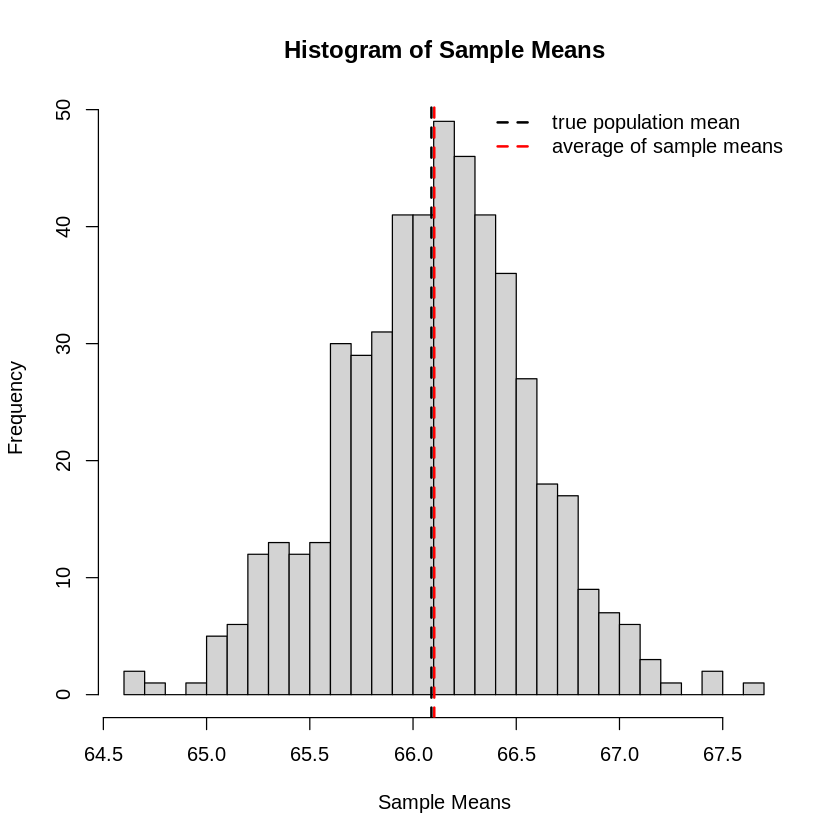

In [ ]:
# Histogram of sample means
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

# ignore below (base R plotting)
abline(v = mu, lty = 2, lwd = 2)
abline(v = mean(sample_means), lty = 2, lwd = 2, col = "red")
legend("topright",
       c("true population mean", "average of sample means"),
       lwd = 2, lty = 2, col = c("black", "red"), bty = "n")

* What do we notice?

  * The average of all the samples means is approximately the true population mean!

  * That is, the center of the sampling distribution of $\bar{X}$ is approximately the true population mean $\mu$

* Why do we care?

  * If we had the sampling distribution (typically do not have), we could compute a lower and upper bound that contains the center (true population mean $\mu$) with a certain probability

* For example,

  * We could calculate the 2.5% (lower bound) and 97.5% (upper bound) percentiles

  * These percentiles contain 95% of the distribution

  * i.e. The true population mean is between the 2.5% and 97.5% percentiles with 95% probability



In [ ]:
# calculate 2.5% and 97.5% percentiles
bounds <- quantile(sample_means, probs = c(0.025, 0.975))
print(bounds)

# save each interval boundary
lower  <- bounds[1]
upper  <- bounds[2]

    2.5%    97.5% 
65.19695 66.99480 


* Visualize the interval on the histogram

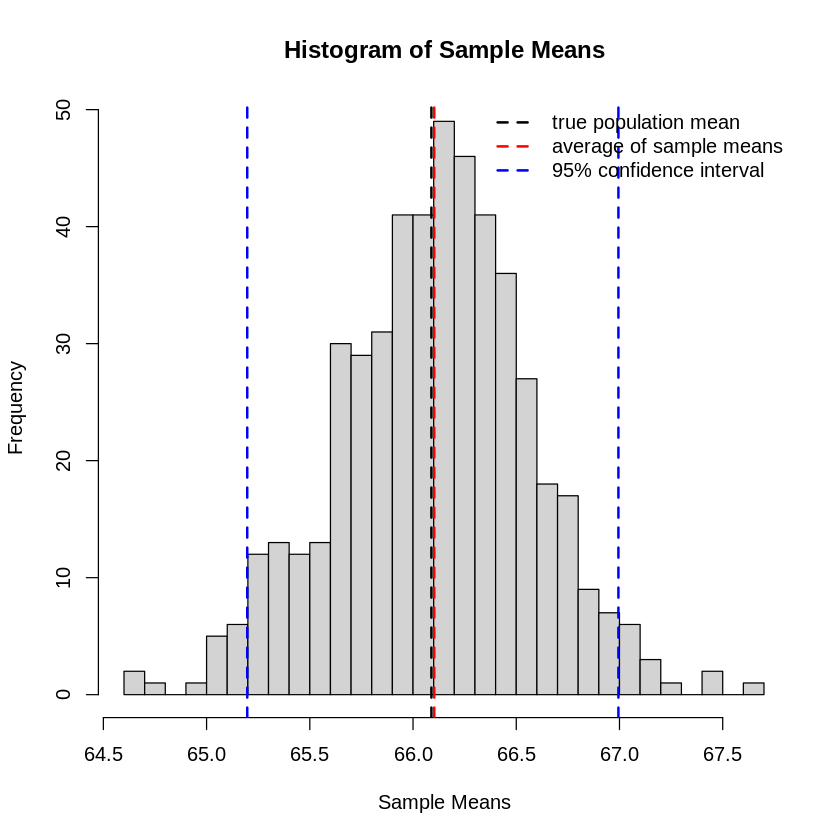

In [ ]:
# Histogram of sample means
hist(sample_means, breaks = 30,
     main = "Histogram of Sample Means",
     xlab = "Sample Means")

# ignore below (base R plotting)
abline(v = mu, lty = 2, lwd = 2)
abline(v = mean(sample_means), lty = 2, lwd = 2, col = "red")
abline(v = lower, lty = 2, lwd = 2, col = "blue")
abline(v = upper, lty = 2, lwd = 2, col = "blue")
legend("topright",
       c("true population mean", "average of sample means",
       c("95% confidence interval")),
       lwd = 2, lty = 2, col = c("black", "red", "blue"), bty = "n")

* This is known as a confidence interval

* The interpretation is

  * We are 95% confident that the true population mean math score is in the interval [65.2, 67.0]



---




### Bootstrapping for Confidence Interval Estimation

* Remember, we don't have the true sampling distribution of the sample mean

* However, we can simulate a sampling distribution using a process called
 ***bootstrapping***

* In bootstrapping, we "pretend" our sample is our population

* We can repeatedly sample from our sample ***with replacement*** to gain an understanding of our sampling distribution

* The bootstrapping procedure for confidence intervals is performed as follows

  1. Let `n` be the size of our sample. We first randomly sample `n` observations ***with replacement*** from our sample data. This is called a bootstrapped sample

  2. Compute the statistics in which we are interested (e.g., mean) on this bootstrapped sample and save

  3. Repeat steps 1 and 2 many times (e.g., `B > 500`). For example, if `B = 1000` This will produce `B = 1000` mean estimates

  3. Compute lower (e.g., 2.5%) and upper (97.5%) percentiles of your `B = 1000` means, which define our (95%) confidence interval

#### Bootstrapping Procedure

* Let's do an example with the dataset of math scores

* Remember that we are considering the entire math score dataset as the population

* In practice, this is typically not possible, so let's take a random sample of size `n = 50` from the population

In [ ]:
set.seed(2)  # ignore

# random sample of size 50
data <- sample(population$math.score, size = 50, replace = FALSE)
print(data)

 [1]  87  54  42  62  84  77  47  75  60  57  80  46  93  55  56  72  94  77  76
[20]  61  84  49  74  64  76  88  48  82 100  59  62  79  53  62  70  57  50  64
[39]  91  65  71  64  59  37  65  50  73  87  51  93


In [ ]:
# store our sample size
n <- length(data)
n

[1] 50

* **Step 1:** Randomly sample `n` observations with replacement from our sample

  * Since we are sampling WITH replacement, note that some individuals in our bootstrapped sample may appear more than once or not at all!

* **Step 2:** Compute the statistics in which we are interested

  * We'll compute the mean

* **Step 3:** Repeat steps 1 and 2 many times (e.g., `B > 500`).

  * Let's use `B = 1000` bootstrap samples.
  * We can calculate the 1000 bootstrap sample means using a `for` loop

* Plotting a histogram of the bootstrap means, we observe an estimate of the sampling distribution of the sample mean

In [ ]:
# bootstrap sample of size n
boot_samp <- sample(data, size = 50, replace = TRUE)
boot_samp

# compute mean of random sample
boot_mean <- mean(boot_samp)
boot_mean

# number of bootstrap samples
B <- 1000

# sample size
n <- length(data)

# compute B bootstrap means
boot_means <- vector(length = B)

# loop to calculate many bootstrap means
for (i in 1:B) {

  # bootstrap sample of size n
  boot_samp <- sample(data, size = n, replace = TRUE)

  # compute mean of single bootstrap sample
  boot_mean <- mean(boot_samp)

  # store the bootstrap mean
  boot_means[i] <- boot_mean

}

hist(boot_means, breaks = 30,
     main = "Histogram of Bootstrapped Means",
     xlab = "Bootstrapped Means")

[1] 77 42 42 87 74 87 71 65 56 53 77 75 57 65 59 50 62 84 93 47 93 64 37 61 82
[26] 62 60 64 73 93 77 79 56 93 70 75 79 93 94 84 64 51 60 56 57 94 51 72 84 80

#### Bootstrap Confidence Interval

* Using this distribution, we can now compute percentiles

* We compute the 2.5% (`0.025`) and 97.5% (`0.975`) percentiles

* This forms a 95% confidence interval (97.5% - 2.5% = 95%)
* We interpret the 95% bootstrap confidence interval as follows

  * We are 95% confident that the true population mean math score is within the interval [63.26, 72.04]

  * In other words, there is a high probability that the true population mean math score is between 63.26 and 72.04
  * If this mean math score is acceptable for the proposed standardized math test, we can move forward with its implementation on a larger scale

In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 




---




### Statistical Inference using a Confidence Interval

* The purpose of a confidence interval is to provide a set of bounds that contain the true population average with a level of confidence (95%)

* In practice, we can use confidence intervals to perform statistical testing

  * That is, we can use a confidence interval to determine if the true population mean is greater than or less than (or different than) a certain value with some probability
* From the interval below, we know that the true population average math score is contained in the interval with 95% probability

* Since we are highly confident (95%) that the true mean is inside the interval,
  * we say the true mean is ***significantly*** different from values ***outside*** interval
  * we say the true mean is ***not significantly*** different from values ***inside*** interval


In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 


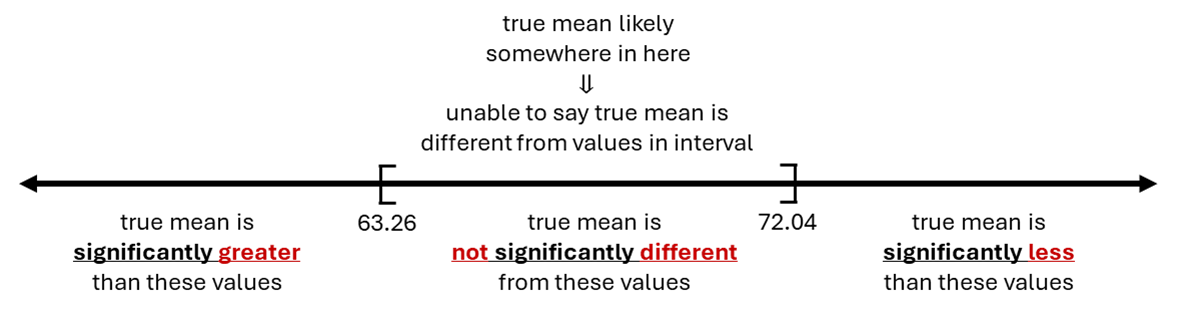

* From the prior scenario, what if we require the math test to have an average greater than 60 points?

* Since the score of 60 is below the lower bound of the interval, we say
  * "Based on the 95% confidence interval, the true population average math score is ***significantly*** greater than 60 points"
    OR
  * "Based on the 95% confidence interval, the true population average math score is ***significantly*** different than 60 points"

* This concept leads us into hypothesis testing, which we will cover next lecture!

More examples interpretations:

* "The true population average math score is ***significantly*** less than 73 points"

* "The true population average math score is NOT ***significantly*** different than 72 points"

* "The true population average math score is NOT ***significantly*** different than 65 points"

In [ ]:
# compute 95% confidence interval
print(quantile(boot_means, probs = c(0.025, 0.975)))

 2.5% 97.5% 
63.26 72.04 


# Course Transcript

Hi class. Welcome to today's lecture. So we're gonna have a change of pace a little bit. And now we're finally starting to go into some statistics. We're not gonna cover too many statistics in this course. It's mainly intro to a lot of the data science methods. But we will be covering a bit of inference. So first, we're gonna look at simulation-based inference with bootstrapping.

So far in the class, we've learned a lot. We've covered a lot of material—we've covered importing and exporting data, so learning how to import data from a CSV format, JSON format, scraping data from the web.

Once we have that data imported into our environment, we can then clean it up. This is also known as data wrangling, and organize our data for an actual analysis. We've learned a ton of stuff for that that makes our coding more efficient, like subsetting, writing functions, merging data, and so on.

We also learned a bit about summarizing our data using descriptive statistics, primarily using measures of central tendency like mean, median, and mode, as well as measures of variability, most often using variance, but sometimes range.

Then, finally, we've learned to explore relationships within our dataset using various plotting mechanisms like scatter plots, box plots, and so on—specifically making these visualizations more aesthetically pleasing using a package called ggplot2.

So I just want to take some time to say, congratulations. You've learned a lot already, and you've basically learned everything you need to know to perform a basic dataset analysis or basic data analysis. The thing is, I just want to emphasize that our descriptive statistics often only characterize the sample of a population—a sample of data taken from a much larger population.

We've only been working with samples from a population. And in order to understand characteristics about the population itself, not just from a sample, we require a new concept. And this concept is statistical inference. It may be new to you, or you may have taken a statistics course in the past. But basically, we're going to cover a bit of statistical inference today.

Now, the definition of this is simply inferring quantities about a population using a sample from that population. So if you want to learn a little more about a population, you can take a sample from that population, calculate quantities from that sample, and then infer something about the population using your sample. And this is all accounting for this concept of sampling variability, which we will cover. So let's first explore this concept of sampling variability.

Sampling variability. Why would we need to sample in general? Why not just collect data on the entire population? In practice, data scientists and statisticians are interested in characteristics of a population. As I stated in the last video, this is most often the mean—we want to know the average of something. There are other metrics like variance and median and quantiles which we are interested in as well.

As an example, say we're interested in the average caloric consumption among all first-time undergraduate students—in the US or worldwide. Or say you're interested in the average amount of emphysema in the lungs of all longtime smokers. A final example is the average math or writing test scores among all students that are underrepresented in STEM fields. These are large populations.

The problem is, we're often unable to collect data on entire populations. They are massive. If we wanted to collect data on the entire world, that would be billions of people. That would be infeasible. Can we actually collect dietary data on all undergraduate students? Possibly, although that would be very costly. Can we do a CT scan on all longtime smokers? It depends on the purpose of that. Would you want to subject tons of smokers to more radiation? No, you probably only want to take a sample first, just to see if a treatment worked. Can we provide the same test to all students in the country? Again, we possibly can, but this would often be financially infeasible.

So what do we do? How can we determine something about the population without gathering data on the entire population? That's what sampling is for. That's where sampling comes in. So what we end up doing is we have our population, and we'd like to characterize our population—such as finding the mean of something about the population like the average test scores.

Then what we do is we take a random sample from the population and calculate the mean of the sample, and then infer back to the population. So essentially in statistical inference, we have a population, we sample a subset from that population, we do our analysis on that sample—such as calculating the mean—and then we infer the true population mean from our sample. This is the basics of sampling and why we need it.

To illustrate this concept of sampling and this concept of sampling variability, we have a scenario here for a class. Imagine you're a researcher in the Math Education Department, and you're proposing a new placement test for undergraduate college students.

You'd like to estimate the average math score for this test because you don't want this test to be too difficult for placement of these students into whichever courses they need in the curriculum.

The question is, can we offer this test to all students and just see if it's good or not? Well, you can, but what if it's a bad test? If we provide the test to everyone, that would be a lot of money wasted. It's very expensive to run these types of studies. Some students might also opt out, so you might not have the full sample size anyway.

Offering this prospective test to all students may not be feasible, especially if it's not an approved test yet. You're just running an experiment.

So what can we do? Like I said in the last video, we can perform sampling. We can take a random sample of college students from the entire population of college students. We can then calculate the average math score or the average test score within that sample and then use that to estimate the true population mean math score.

So I'm going to illustrate this point using some code and an actual dataset. Here's our example population. For illustration, we're just going to assume that we know the true population mean math score. And that's represented typically by the symbol μ (mu), and the true population standard deviation, which we're not going to use too much today—but I calculated it anyway—is 15.16, represented by the Greek letter σ (sigma).

Now, our population—we're going to load this dataset here. I just want to emphasize that typically in real statistical analysis, you never have access to your entire population. You only have a sample. But I'm loading our “population” data for illustration of this concept. So we have our population here.

We have our population size, which is typically unknown. So I'm just taking the number of rows. Our population is just a single-column data frame with a ton of different math scores.

So we have a thousand students taking this math test.

We can calculate the mean of our population math scores, and that’s just 66.089, as stated above. Same thing here—15.16, stated above.

And then we have our distribution.

Now remember again, this is our population. So what we're going to do is take a random sample from this theorized population, and I'm going to show you this concept of sampling variability.


All right. So in practice, I said that we do not know our population. In fact, the population is often way too large to collect data on the entire population. So let's simulate taking a sample from our population here, which is just the model, for example.

Let's simulate taking a random sample of, say, 50 students. So our sample size will be 50, and we'll randomly sample 50 students from this population data frame that we've loaded in the prior video.

We can do this using something called the sample() function. This function takes a random sample of size 50 from this numeric vector—our math scores. So we're sampling 50 scores from this vector of scores, specifying replace = FALSE. This means we are sampling without replacement—we cannot sample the same individual more than once, which makes sense.

After running that, we get our 50 math scores. Then, we can calculate the mean of our sample—these 50 math scores. This is used to estimate our true population mean, which is typically unknown, although we do know it here for this example. Our average sample mean math score is about 56. This sample mean is typically denoted as X̄ (X-bar).

Now, we ask: is this sample mean of 56 close to the true population mean of 66? Not really—it's quite far. This shows that because we're taking a random sample, the mean of our sample could be quite far from the true population mean. And this can be a problem.

Let’s try taking another random sample. Running the script again, we get another random sample of size 50, and this time, the sample mean is 67.14. Is that closer to the population mean? Yes—it’s much closer. This change in sample means from one sample to another is called sampling variability.

Sampling variability is a very important concept. It’s the reason why statistical inference exists. It tells us that estimates like the mean—calculated from samples—vary from sample to sample due to this inherent randomness.

So let’s take this further: we'll sample 50 students, calculate the sample mean, and do this over and over again—500 times. We'll take a random sample from the population, calculate the sample mean, and save it. We'll do it again and save that, and continue this 500 times to produce 500 different sample means.

Here’s how the loop works:

    We define n_samp = 500, which is the number of samples we want.

    We create an empty vector to store our sample means.

    Then we write a for-loop from 1 to 500. Each iteration:

        Takes a random sample of 50 students,

        Calculates the mean of that sample,

        Stores it in the vector.

After running this, we have a vector with 500 sample means. Looking at the first 100, they’re all just means from repeated sampling.

Now, because we have 500 sample means, we can plot the distribution of these sample means using a histogram. We’re not using ggplot here—just a quick base R histogram with 30 breaks.

You can now see a distribution of sample means. This histogram shows the distribution of possible sample means if we were to take 500 random samples. This distribution is called the sampling distribution of the sample mean (X-bar). It's a visual way to see that the sample mean actually varies from sample to sample.

In practice, we don’t get to see this sampling distribution. We usually take just a single sample—not many samples. But we know that this distribution exists.

So, what does the histogram suggest? It tells us we can’t just assume the mean from a single sample is equal to the population mean. That single sample mean could vary greatly depending on which sample was taken.

So how can we still infer something about the population if we can’t rely on just that single sample mean?

Well, we can incorporate our understanding of how the sample mean behaves across samples—in other words, the sampling distribution. If we understand what this distribution looks like, we can infer properties about the population from our single sample.

That’s the idea behind statistical inference: inferring properties about a population based on our understanding of the variability in sample estimates.

Statistical inference itself is typically performed using two main approaches: confidence intervals and hypothesis testing. And there are different ways to calculate confidence intervals:

    Conventional theory-based methods (not covered in this course),

    And simulation-based methods.

Since we’ve been learning coding and loops, we’ll focus on a simulation-based approach to confidence intervals. This will help us infer population values based on the distribution of our sample mean.

Alright. So what do we know so far? We have a population. We want to characterize that population in some way, such as the mean. We can't collect data on the entire population, so we collect data on a sample from that population. And we calculate some metric like the mean. But we can't use the mean to estimate the true population mean directly because of sampling variability. Right? There's some uncertainty there. We might have a sample mean that's quite off because we took a bad sample.

So let's cover how we can calculate some confidence intervals from the sampling distribution which will enable us to infer something about the population, given that we have this thing going on in the background of sampling variability.

So below is a histogram. It's the same histogram from above, right? Our sampling distribution of sample means from repeatedly sampling. So this is a histogram, except I'm going to overlay the true population mean as well as the average of all of our sample means on the same plot. Right? So it's the same distribution, except the black line shows the true population mean, and the red line shows the mean of all our sample means. So the mean of the 500 sample means from the separate 500 samples we took earlier.

Now, what do we notice from this plot? Well, first of all, it's pretty striking that the average of all the sample means is approximately the true population mean. And this alludes to something called the law of large numbers, which we don't need to know for this class. You'll learn plenty of that later on. But that's essentially what that is.

So what we're seeing here is that the center of our sampling distribution of our sample means is approximately equal to the true population mean.

Now, why do we care about this? Why do we care that this true population mean is at the center of our sample mean?

Well, what if we had the sampling distribution? We typically don't have it, like I said. We're not going to sample over and over again. But if we had the true sampling distribution, what we could do is compute some lower bound, so some bound down here, and then some upper bound. Right? And these bounds would contain the center of the distribution, which is the true population mean, with a certain probability.

So if we had the true sampling distribution, we could compute some lower bound and upper bound that contains the true population mean with some probability—with high probability. Okay? This is known as a confidence interval.

So here's an example. Most commonly, we calculate 95% confidence intervals. So if I were to calculate the two and a half percent percentile, which is our lower bound—right, because two and a half percent of data falls below that—and then calculate the 97 and a half percentile, which is up here—so 97 and a half percent of the data is below that—right? This means that 95% of that distribution is contained within these two boundaries.

And again, this is because there's 95% of the density between two and a half and 97 and a half, with just 5% total on the ends of this distribution.

Now, if we calculated these, what we would find is that the true population mean is between those two percentiles with the 95% probability. So doing this in R, we can use the quantile function, which we've seen before, to calculate the 0.025 quantile and the 0.975 quantile from our sample means from our sampling distribution. And again, this is assuming that we have this sampling distribution.

Just a small aside—I say two and a half percent here. These are called percentiles, but when they're represented as decimals, we call them quantiles.

Alright. So this is our lower and upper bound. Right? So there is a 95% chance that the true population mean is contained within these two values.

Now, we can visualize on the same histogram that interval. Right? This is our confidence interval.

And the interpretation, if you were to write it down as a script: we are 95% confident that the true population mean math score is in this interval based on our sampling distribution, which we typically do not observe.

Right. So we went over in detail, right, the sampling distribution and coming up with some sort of confidence interval—an interval that contains our true population value with a high probability. The thing is, remember, in practice, we actually don't have this sampling distribution, right?

The thing is, we can simulate it. Now, in conventional statistics, you make assumptions on the distribution, such as normality. But in this case, we can actually simulate a sampling distribution using a process called bootstrapping.

So the way bootstrapping works is, since we don't have our population—we only have a sample from our population—we, in a sense, pretend, right, that our sample is our population. And then we end up sampling from our sample.

Now, the difference here is we're going to repeatedly sample from our sample, which is our supposed population, but we're going to do it with replacement. Right? So there are individuals or observations that can occur more than once or can be left out altogether. Right? And by sampling our sample repeatedly with replacement, this gives us an estimate of our sampling distribution—gives us an estimate of this distribution here.

This is a process called bootstrapping.

So the bootstrapping procedure for confidence intervals is as follows. Right? So we have a sample size. We've been taking sample sizes of 50. So let n be 50 here.

What we do is we first randomly sample 50 observations, or 50 rows, from our dataset. And we do so with replacement. Right? This is called our bootstrap sample. It's a single sample.

Then we compute whichever statistics we want. Typically, that's the mean, although you can calculate pretty much anything like median, mode, or median, variance, and so on. So we compute the mean from that bootstrap sample, and we save that mean.

Then we'll repeat this process—repeatedly sampling from our sample with replacement—and we'll do it many times: 500, 1000, at least 500 times. Right?

Then what we do from there is, we have our estimate of our sampling distribution, and then we just calculate our lower and upper percentiles as normal to get our confidence interval. Right? So let me just show you an example of this bootstrapping procedure.

So let's do an example with the math scores. Here, I'm going to take a sample from our population. This is our random sample, our initial random sample. I'm not starting the bootstrapping procedure yet. Right?

Alright. So we're going to consider our math score dataset as our entire population, and I'm just going to take a random sample of size 50. This is our dataset. So imagine you're running a study, and this is the data you import into R. Right? So it's just a sample from your unknown population.

Right. n is 50, because we took a random sample of size 50.

Now, if we want an estimate of our sampling distribution, right, we can use bootstrapping.

So what I'll do is step one: randomly sample 50 observations with replacement. Right? So I'm setting replace here to being TRUE.

And again, note that since we are sampling with replacement, some individuals will appear more than once in one of the samples; some might not appear at all.

So I'm taking a sample from my sample. Right? data is our sample.

So sampling with replacement—that's our first bootstrap sample.

Then I'm going to calculate the mean of that bootstrap sample. And this is my first bootstrap mean.

Okay?

But remember, bootstrapping is a repeated process. We're simulating this sampling variability in our sampling distribution. So I'm going to repeat it many times, and we do this using a for loop.

There are better ways to do it, but I want to use a for loop since we understand that and have covered that in this class.

So I'm going to sample from our sample 1,000 times. So we're going to have 1,000 bootstrap samples.

This is our sample size.

This is an empty vector where I will store our bootstrap means.

And I'm going to tell R I want to create a for loop which iterates with i through 1 through 1,000.

And when i is 1, it's going to sample with replacement, calculate the mean of that sample, and then store that mean in the first entry. And this continues for the next 999 bootstrap samples. I'm going to go ahead and run that.

And now this creates a new distribution. Right? This looks pretty similar. It might be a little more variable, but this looks very similar to this sampling distribution here. This is unknown. Right? However, we've simulated that using bootstrapping here.

Alright. So plotting all of those bootstrap means, as in a histogram, we observe an estimate of our sampling distribution from that sample mean.

And it's from this sampling distribution that we can actually calculate some confidence intervals and then perform inference on the true population mean.

Alright.

So using this distribution, we can compute the percentiles. So, for example, a 95% confidence interval would require us to compute the 2.5% and 97.5% percentiles.

Right? So I'm going to do this using the quantile function, as I did before. But notice, I'm doing it on boot_means.

Right? boot_means is our 1,000 bootstrap means from the resampling.

Alright. So this is our 95% confidence interval.

And we interpret this 95% bootstrap confidence interval as follows.

Now, as a script, the way you typically write it when you're learning this is: we are 95% confident that the true population mean math score, which is unknown, right, is within this interval. Here it's between 63.26 and 72.04.

So what I mean by this is, there's basically a high probability—there's a 95% chance—that the true population mean is contained within those two values, the lower and upper bound.

Now, if in practice, if you're doing the study, if the mean math score is acceptable for this proposed math test that you're looking into, then you might be able to move forward with a larger population or larger sample and then expand it to all undergrads, because you've confirmed that it's within the acceptable score range, you know, for your purposes.


Alright. So in the last video we talked about the interpretation of a confidence interval, right? We interpret a 95% confidence interval, bootstrap or not, right? It could be a conventional confidence interval.

But we interpret this confidence interval as we are 95% confident that the true population average, right, the true population mean math score is in this interval, right? But what is another use of a confidence interval? We can actually use these intervals for statistical testing, and we'll have a little bit more on this next lecture. And if you're a stat major, you're going to have a lot more of this, right? So that's why I'm not going too in depth into this.

Alright. So the purpose of a confidence interval is just to provide a set of boundaries, right? A lower and upper limit that contain the true population average. It can be something else, but for now we'll look at the mean. So it contains the true population average with some high level of confidence, with a high probability.

So in our case, the majority of the time we use 95%. Okay. Now, in practice, we can also use these confidence intervals to perform statistical inference or statistical testing.

And what I mean by that is, we can use these intervals to determine if a true population mean is either greater than, less than, or different from a value with a certain level of probability. Right? More specifically, we use the terminology significantly different, significantly greater, or significantly less than some value. Alright. So let me show you what I mean by this.

So we already calculated a bootstrap confidence interval at the 95% level, right? A 95% confidence interval. You see that we have the two and a half percent and 97 and a half percentiles here defining our lower and upper limits of this interval.

Now again, from this interval, we know that the true population average math score is contained between these two values, right? And the way I like to explain it to my students is using a number line, right? So we have a number line, and we have two confidence intervals here, or a confidence interval consisting of two bounds, right?

Now because we're so highly confident, right, we're 95% confident that the true population mean is inside this interval.

What we can then say is that the true population mean is significantly different from values outside the interval. Right? So any values here, we could say the true population mean is significantly greater than these values.

And we can also say that the true population mean is significantly less than any of these values. And remember, we can say this because we know the true population mean is in this interval, with a very high probability. There's a high chance that it's here. Alright.

I mean, that's not to say that the true population mean could be outside the interval. There's definitely a chance of that, right? 5% chance. But it's small enough that we're willing to say that it's likely in the interval. Okay. Now, if we were to compare the true population mean to values inside the interval, this changes a bit. Right?

So we say the true population mean is not—let me just fix this typo—is not significantly different from values inside the interval. And the reason is, although we know the true population mean is in the interval with a high chance, we don't know where it is in the interval. So we can't say that this true population mean is different from different values inside the interval. Alright. So just as a recap:

We say the true population mean is significantly different from values outside the interval.

But is not significantly different from values inside the interval.

Okay.

So from that prior scenario, what if we were to—with the math scores—what if we were to require that our placement test, our math test, has to have an overall population average greater than 60 points to be implemented nationwide?

Well, since the score of 60 is down here, it's below the interval.

And since the true population average is likely in the interval,

Well, what we would say is the true population average is significantly greater than 60.

So this satisfies this criterion here.

So more formally, we'd say, based on the 95% confidence interval here, the true population average math score is significantly greater than 60 points.

Or we could say that it's significantly different than 60 points.

Right? Either is true.

Now, this concept leads us into something called hypothesis testing. We just performed a statistical test. We formally don't know what that is yet, but I'll cover that a bit in the next lecture.

Just to drive the point home, here are a couple more examples. So looking at this interval here, or looking at the interval down here, we can say the true population average is significantly less than 73 points. And again, that's because 73 points is above the interval—it’s outside the interval.

The true population average, we would say, is not significantly different than 72 points. And that's because 72 points is right at the edge, but it's still inside the interval.

And then, finally, the true population average math score is not significantly different from 65 points. And that's because this value of 65 points is inside the interval. And since we don't know where inside the interval the true population value is—we just know it's in the interval with a high probability—we cannot say that it's different from 65.

<br>

<br>